<a href="https://colab.research.google.com/github/2303A51469/GENERATIVE-AI_2025/blob/main/2303A52431_WEEK_5_ASSIGNMENT_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Design a multi-layer ANN architecture with one input, one hidden, and one output
layer. Assume a linear activation function in the output layer and a sigmoid activation function
in the hidden layer.

• Write Python code for a backpropagation algorithm with gradient descent optimization to
update weights and bias parameters of the ANN model with training data shown in Table
1.

• Calculate the mean square error with training and testing data shown in Table 2.

• Write Python code that reads the input data [x1 and x2] from the user. Predict the output
with deployed ANN model
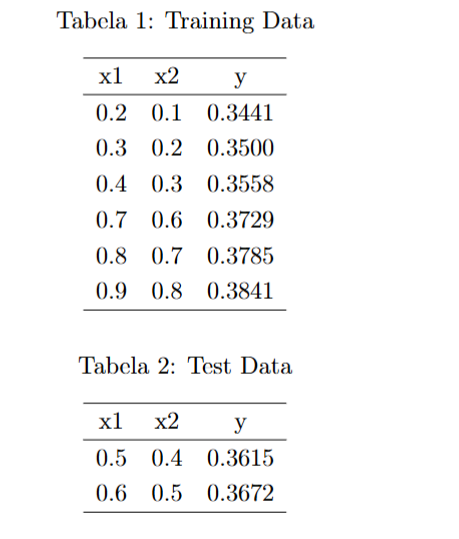

In [1]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X_train = np.array([[0.2, 0.1], [0.3, 0.2], [0.4, 0.3], [0.7, 0.6], [0.8, 0.7], [0.9, 0.8]])
y_train = np.array([[0.3441], [0.3500], [0.3558], [0.3729], [0.3785], [0.3841]])

X_test = np.array([[0.5, 0.4], [0.6, 0.5]])
y_test = np.array([[0.3615], [0.3672]])

np.random.seed(0)
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

W1 = np.random.rand(input_neurons, hidden_neurons)
b1 = np.random.rand(1, hidden_neurons)
W2 = np.random.rand(hidden_neurons, output_neurons)
b2 = np.random.rand(1, output_neurons)

learning_rate = 0.1
epochs = 5000

for epoch in range(epochs):
    hidden_input = np.dot(X_train, W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    final_output = final_input
    error = y_train - final_output
    d_output = error
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)
    W2 += hidden_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += X_train.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

train_predictions = np.dot(sigmoid(np.dot(X_train, W1) + b1), W2) + b2
test_predictions = np.dot(sigmoid(np.dot(X_test, W1) + b1), W2) + b2
print("Training MSE:", mse(y_train, train_predictions))
print("Testing MSE:", mse(y_test, test_predictions))
x1, x2 = map(float, input("Enter x1 and x2: ").split())
user_input = np.array([[x1, x2]])
user_output = np.dot(sigmoid(np.dot(user_input, W1) + b1), W2) + b2
print("Predicted output:", user_output[0][0])

Training MSE: 3.4674760083520215e-07
Testing MSE: 1.0177343705766028e-06
Enter x1 and x2: 0.5 0.4
Predicted output: 0.36251003885284566
